In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
# few shot
fpath = '/mnt/c/PythonScripts/segp/github_version/SSL/results/few-shot/few_shot_full.csv'
df = pd.read_csv(fpath)
print(df)

            Models  shenzhencxr  shenzhencxr uncertainty  montgomerycxr  \
0         simclrv1       0.7446                   0.0066         0.6320   
1           mocov2       0.7376                   0.0066         0.6354   
2             swav       0.7522                   0.0065         0.6738   
3             byol       0.7629                   0.0065         0.7098   
4             pirl       0.7748                   0.0060         0.6358   
5   supervised r50       0.7086                   0.0072         0.6231   
6   supervised r18       0.7416                   0.0066         0.6294   
7  supervised d121       0.7343                   0.0065         0.6531   
8              NaN          NaN                      NaN            NaN   

   montgomerycxr uncertainty   bach  bach uncertainty  iChallengeAMD  \
0                     0.0080  80.61            0.0074         0.7490   
1                     0.0074  82.53            0.0071         0.7491   
2                     0.0071  82.

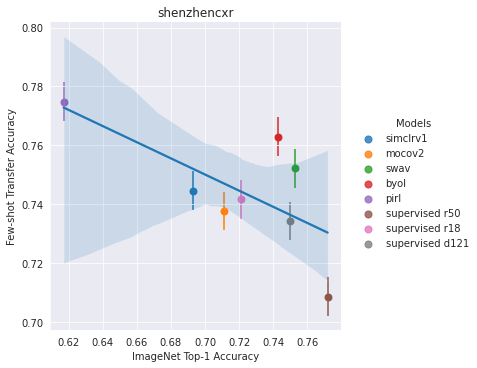

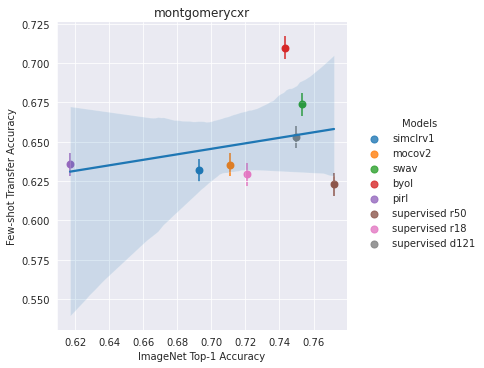

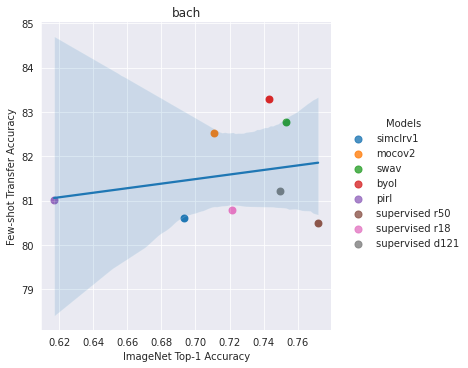

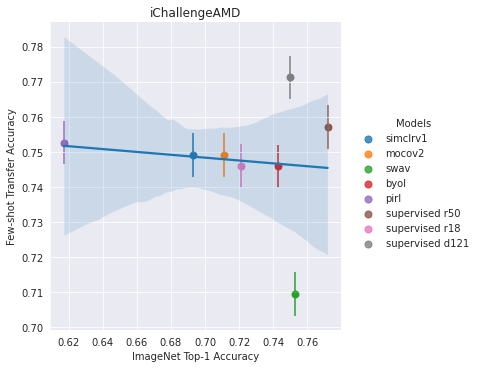

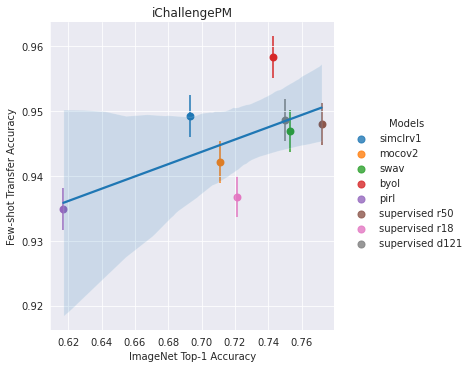

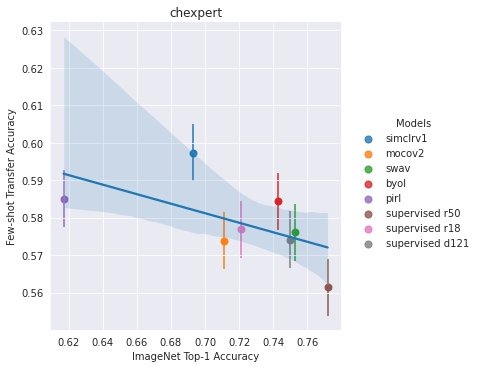

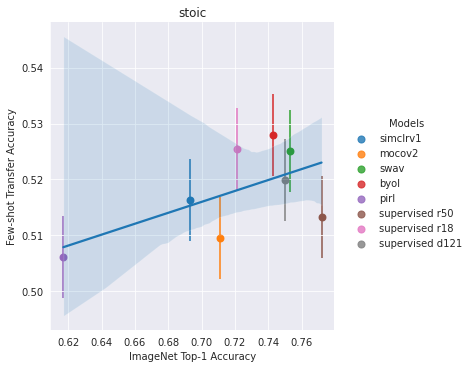

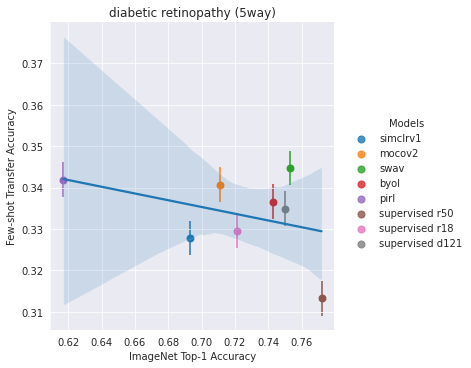

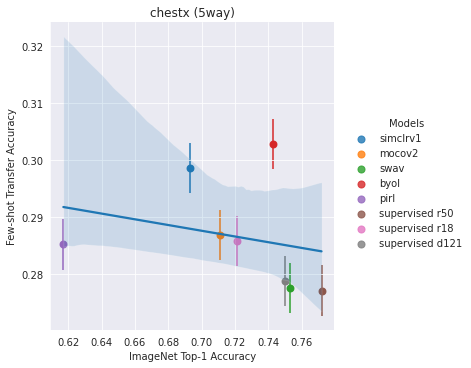

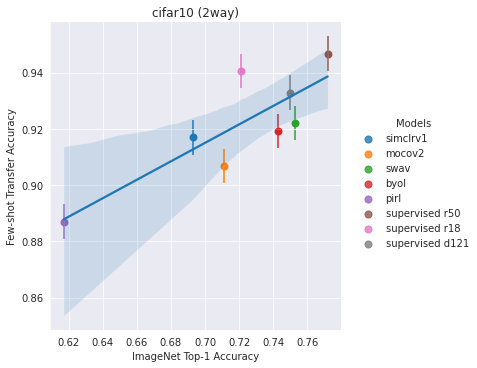

In [13]:

def get_errorbar(x):
    try:
        x = x.iloc[0]
    except:
        x = x[0]
    print("Value: ", x)
    print("Datasets: ", df[datasets[i]])
    print("Index: ", df.loc[df[datasets[i]] == x].index[0])
    index = df.loc[df[datasets[i]] == x].index[0]
    uncertainty = df[datasets[i]+" uncertainty"].iloc[index]
    print("Uncertainty ", uncertainty)
    return uncertainty

df = pd.read_csv(fpath, index_col=False)
df = df.drop(8)
#print(df)
#print(df.columns)
datasets = ["shenzhencxr","montgomerycxr","bach","iChallengeAMD","iChallengePM","chexpert","stoic","diabetic retinopathy (5way)","chestx (5way)","cifar10 (2way)"]
#print(len(df))
for i in range(len(datasets)):
    sns.set_style("darkgrid")
    markers=['x', 'D', 's', '<', '>', 'v', 'X', '+'] #'P'], '4', 'p', '|']
    g = sns.lmplot(x="imagenet top1", y=datasets[i], data=df, fit_reg=False, hue = "Models",palette="tab10", scatter_kws={"s": 50})
    g.map(plt.errorbar,"imagenet top1",datasets[i], yerr=df[datasets[i]+" uncertainty"].to_numpy().mean(), fmt=' ', zorder=-1, label = df["Models"].to_list())
    sns.regplot(x="imagenet top1", y=datasets[i], data=df, scatter=False, ax=g.axes[0, 0])
    plt.ylabel("Few-shot Transfer Accuracy")
    plt.xlabel("ImageNet Top-1 Accuracy")
    plt.title(datasets[i])
    plt.savefig(datasets[i]+"figure.jpg", bbox_inches = "tight")  

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

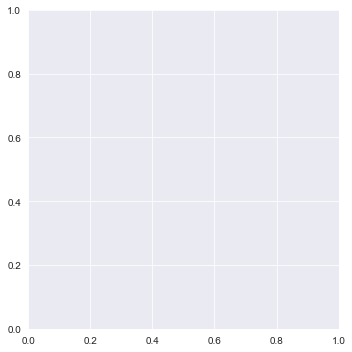

In [6]:
plot_dset('./few-shot/ichallenge_amd.csv', 'iChallenge-AMD')

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

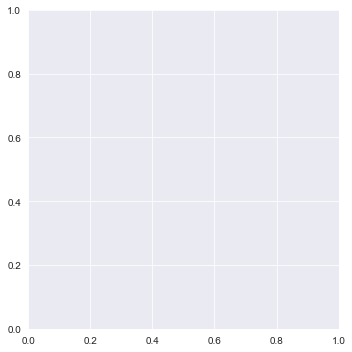

In [ ]:
plot_dset('./few-shot/ichallenge_pm.csv', 'iChallenge-PM')

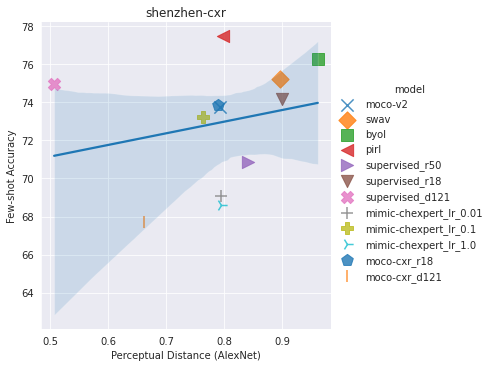

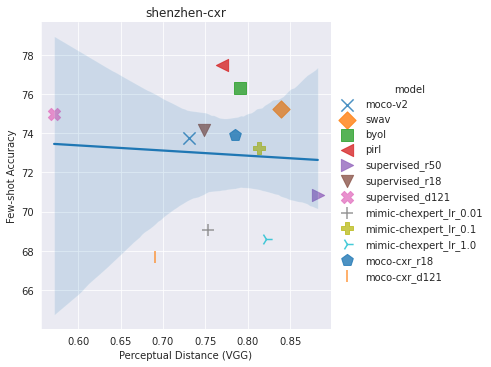

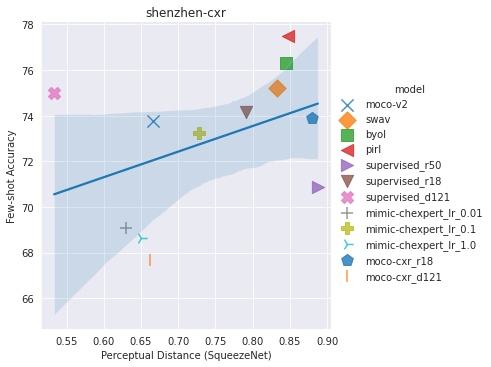

In [ ]:
plot_dset('./few-shot/shenzhencxr.csv', 'shenzhen-cxr')

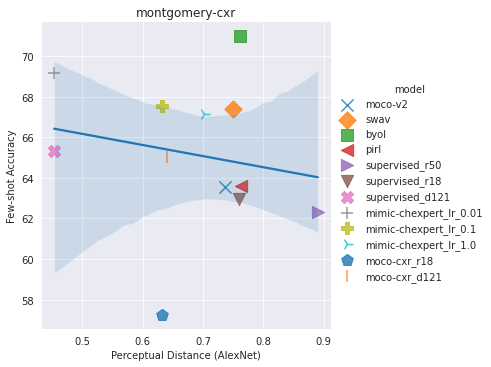

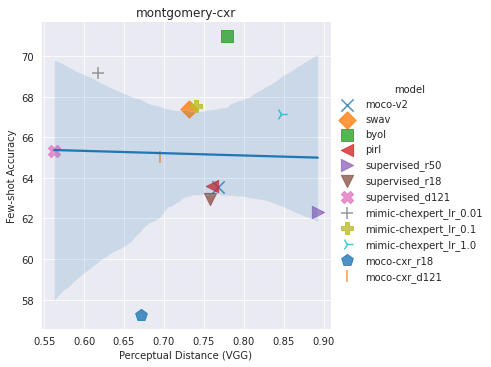

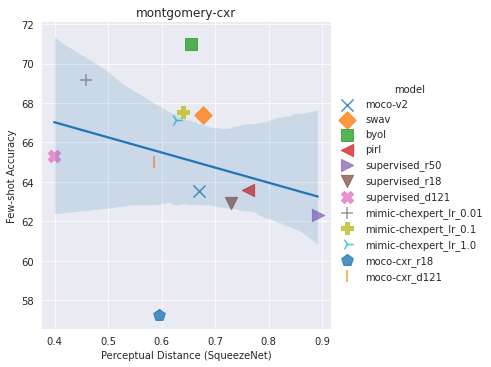

In [ ]:
plot_dset('./few-shot/montgomerycxr.csv', 'montgomery-cxr')

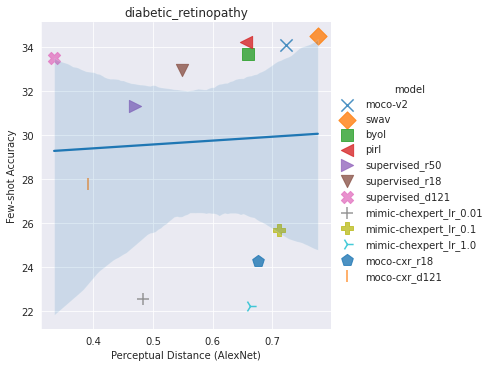

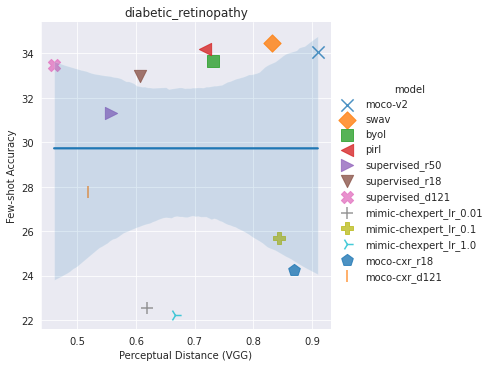

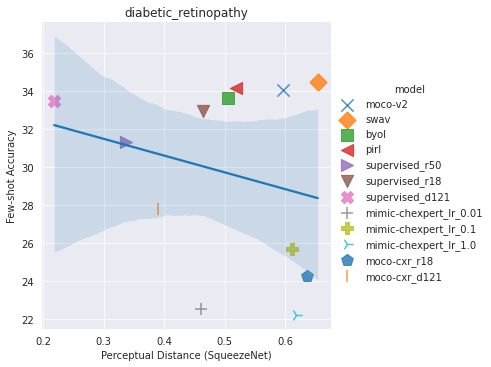

In [ ]:
plot_dset('./few-shot/diabetic_retinopathy.csv', 'diabetic_retinopathy')

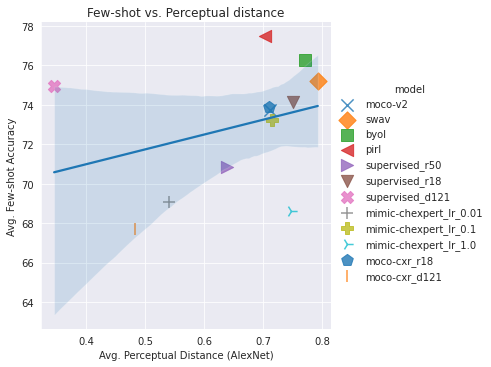

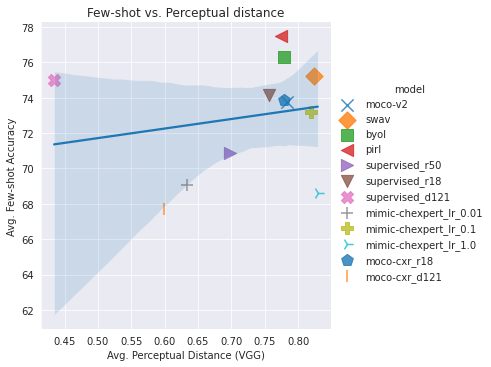

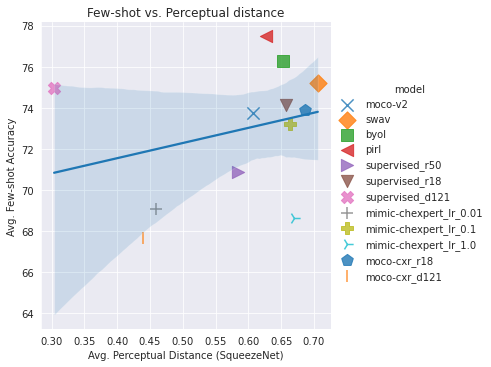

In [ ]:
# plot average across all datasets
dsets = [('diabetic_retinopathy', 'diabetic_retinopathy'), ('ichallenge_amd', 'iChallenge-AMD'),
 ('ichallenge_pm', 'iChallenge-PM') , ('montgomerycxr', 'montgomery-cxr'), ('shenzhencxr', 'shenzhen-cxr')]

average_acc = {}
for i, (dset_name, dset_title) in enumerate(dsets):

    fpath = f'./few-shot/{dset_name}.csv'
    df = pd.read_csv(fpath, index_col=False)
    dset_acc = df.set_index('model').to_dict()['acc']
    for model, acc in dset_acc.items():
        average_acc.setdefault(model, []).append(acc)

for model in average_acc.keys():
    average_acc[model] = np.mean(average_acc[model])



# AlexNet
avg_perceptual_distance_alexnet = {}
for dset, accs in alexnet_dict.items():
    for model, acc in accs.items():
        avg_perceptual_distance_alexnet.setdefault(model, []).append(acc)
for model in avg_perceptual_distance_alexnet.keys():
    avg_perceptual_distance_alexnet[model] = np.mean(avg_perceptual_distance_alexnet[model])


shared_models = dset_acc.keys() and avg_perceptual_distance_alexnet.keys()
dict_intersection = {k: (dset_acc[k], avg_perceptual_distance_alexnet[k]) for k in shared_models}
new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
new_df = new_df.reset_index(level=0)
new_df.columns = ['model', 'few_shot', 'perceptual_distance']

sns.set_style("darkgrid")
markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
plt.xlabel("Avg. Perceptual Distance (AlexNet)")
plt.ylabel("Avg. Few-shot Accuracy")
plt.title("Few-shot vs. Perceptual distance")
plt.show()




# VGG
avg_perceptual_distance_vgg = {}
for dset, accs in vgg_dict.items():
    for model, acc in accs.items():
        avg_perceptual_distance_vgg.setdefault(model, []).append(acc)
for model in avg_perceptual_distance_vgg.keys():
    avg_perceptual_distance_vgg[model] = np.mean(avg_perceptual_distance_vgg[model])


shared_models = dset_acc.keys() and avg_perceptual_distance_vgg.keys()
dict_intersection = {k: (dset_acc[k], avg_perceptual_distance_vgg[k]) for k in shared_models}
new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
new_df = new_df.reset_index(level=0)
new_df.columns = ['model', 'few_shot', 'perceptual_distance']

sns.set_style("darkgrid")
markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
plt.xlabel("Avg. Perceptual Distance (VGG)")
plt.ylabel("Avg. Few-shot Accuracy")
plt.title("Few-shot vs. Perceptual distance")
plt.show()




# SqueezeNet
avg_perceptual_distance_squeezenet = {}
for dset, accs in squeezenet_dict.items():
    for model, acc in accs.items():
        avg_perceptual_distance_squeezenet.setdefault(model, []).append(acc)
for model in avg_perceptual_distance_squeezenet.keys():
    avg_perceptual_distance_squeezenet[model] = np.mean(avg_perceptual_distance_squeezenet[model])


shared_models = dset_acc.keys() and avg_perceptual_distance_squeezenet.keys()
dict_intersection = {k: (dset_acc[k], avg_perceptual_distance_squeezenet[k]) for k in shared_models}
new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
new_df = new_df.reset_index(level=0)
new_df.columns = ['model', 'few_shot', 'perceptual_distance']

sns.set_style("darkgrid")
markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
plt.xlabel("Avg. Perceptual Distance (SqueezeNet)")
plt.ylabel("Avg. Few-shot Accuracy")
plt.title("Few-shot vs. Perceptual distance")
plt.show()



